## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [84]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [85]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,01:45,2020-01-01T01:45:00+01:00,5612.0,1093.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,28.33,48.65,1.98,37.88,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:00,2020-01-01T02:00:00+01:00,5655.0,1055.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,27.41,47.43,2.00,38.57,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:15,2020-01-01T02:15:00+01:00,5805.0,1084.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,24.96,44.34,1.93,38.23,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,03:00,2020-01-01T03:00:00+01:00,5420.0,341.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,20.83,34.55,2.10,38.91,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,03:30,2020-01-01T03:30:00+01:00,5324.0,236.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,20.55,33.48,2.16,39.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-23,12:15,2020-02-23T12:15:00+01:00,4955.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5180,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-23,16:30,2020-02-23T16:30:00+01:00,4058.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5181,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-23,19:30,2020-02-23T19:30:00+01:00,5248.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5182,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-23,21:15,2020-02-23T21:15:00+01:00,4907.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [86]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True)
data['Date - Heure'] = data['Date - Heure'].dt.tz_convert('Europe/Paris')
data.dtypes

Code INSEE région                             int64
Région                                       object
Nature                                       object
Date                                 datetime64[ns]
Heure                                        object
Date - Heure           datetime64[ns, Europe/Paris]
Consommation (MW)                           float64
Thermique (MW)                              float64
Nucléaire (MW)                              float64
Eolien (MW)                                 float64
Solaire (MW)                                float64
Hydraulique (MW)                            float64
Pompage (MW)                                float64
Bioénergies (MW)                            float64
Ech. physiques (MW)                         float64
TCO Thermique (%)                           float64
TCH Thermique (%)                           float64
TCO Nucléaire (%)                           float64
TCH Nucléaire (%)                           float64
TCO Eolien (

In [87]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [88]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [89]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2020-01-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2020-01-01 01:45:00+01:00             5612.0          1093.0   
 1    2020-01-01 02:00:00+01:00             5655.0          1055.0   
 2    2020-01-01 02:15:00+01:00             5805.0          1084.0   
 3    2020-01-01 03:00:00+01:00             5420.0           341.0   
 4    2020-01-01 03:30:00+01:00             5324.0           236.0   
 ...                        ...                ...             ...   
 4169 2020-01-01 14:45:00+01:00             5125.0           356.0   
 4170 2020-01-01 17:15:00+01:00             5205.0          1161.0   
 4171 2020-01-01 18:00:00+01:00             5549.0          1420.0   
 4172 2020-01-01 18:45:00+01:00             5768.0          1720.0   
 4173 2020-01-01 20:00:00+01:00             5854.0          1917.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN          1.0           0.0            1590.0   
 1  

In [90]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

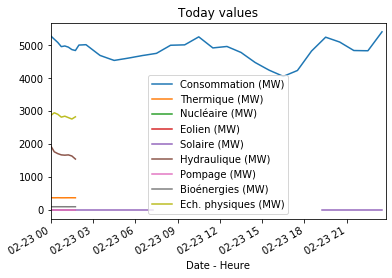

In [91]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")
# TODO: replace with : data.loc[data['Date - Heure'] == today].plot(x='Date - Heure', title="Today values")

In [92]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [93]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

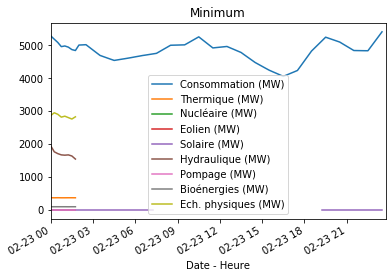

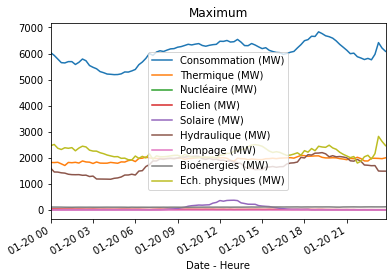

In [94]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [95]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5395.647887
Thermique (MW)         1168.523697
Nucléaire (MW)                 NaN
Eolien (MW)              11.404827
Solaire (MW)            134.514992
Hydraulique (MW)       1562.476303
Pompage (MW)             -8.292429
Bioénergies (MW)        107.027139
Ech. physiques (MW)    2421.434022
TCO Thermique (%)        21.344743
TCH Thermique (%)        35.628452
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.213293
TCH Eolien (%)           23.759882
TCO Solaire (%)           2.498725
TCH Solaire (%)          10.252120
TCO Hydraulique (%)      28.887536
TCH Hydraulique (%)      47.811971
TCO Bioénergies (%)       1.990877
TCH Bioénergies (%)      36.528205
Column 26                      NaN
dtype: float64

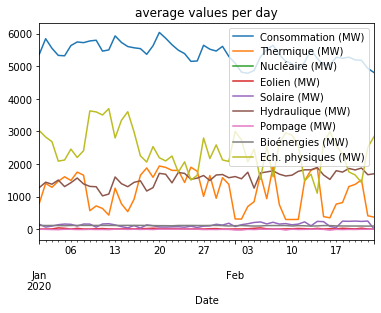

In [96]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

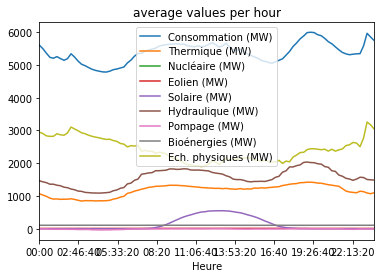

In [97]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

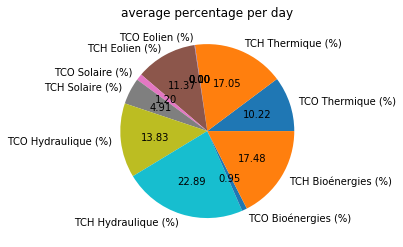

In [98]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')